## Subject 1: MNIST Clustering

#### 1.Download the MNIST data set using the code below.

In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
from sklearn.decomposition import PCA

In [2]:
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

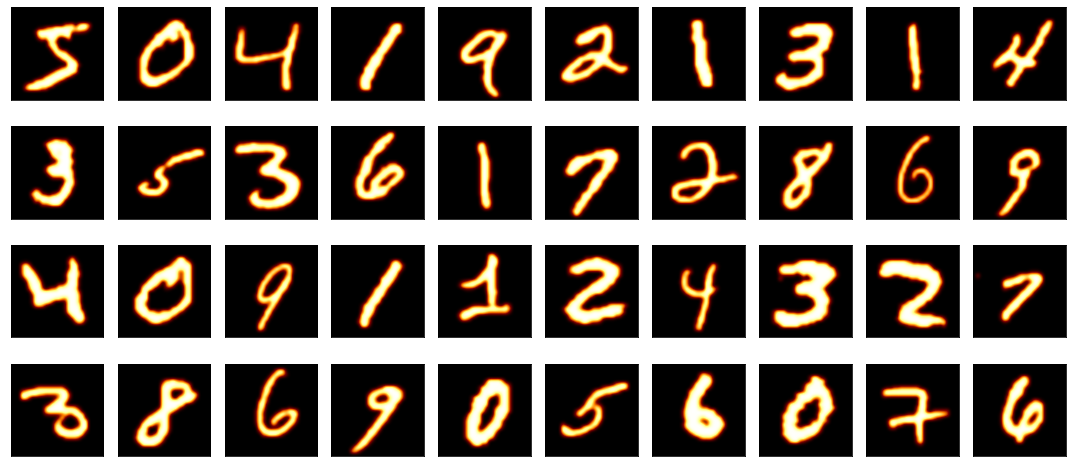

In [4]:
# plot some of the MNIST numbers
plt.figure(figsize=(15,15))
# plot 40 pictures
for i in range(0,40):
    plt.subplot(9,10,i + 1)
    # reshape from 1d to 2d pixel array
    grid_data = X[i].reshape(28, 28)
    plt.imshow(grid_data, interpolation = "bicubic", cmap = "afmhot")
    # hide x, y axes
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

Text(0.5, 1.0, "Single Variable's Exlained Variance")

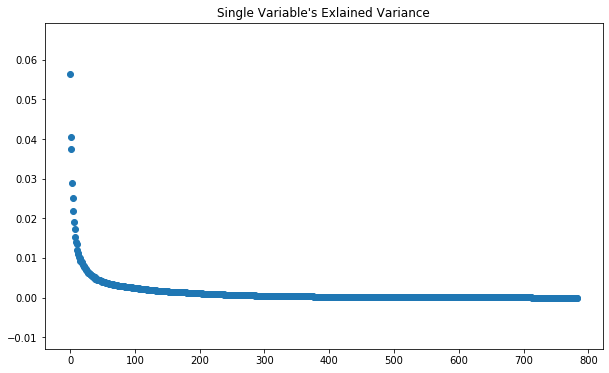

In [9]:
# Determine explained variance of each variables
from sklearn.decomposition import PCA

pca = PCA(n_components=784).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(784)), pca.explained_variance_ratio_)
plt.title("Single Variable's Exlained Variance")

Text(0.5, 1.0, "Cumulative Variable's Exlained Variance")

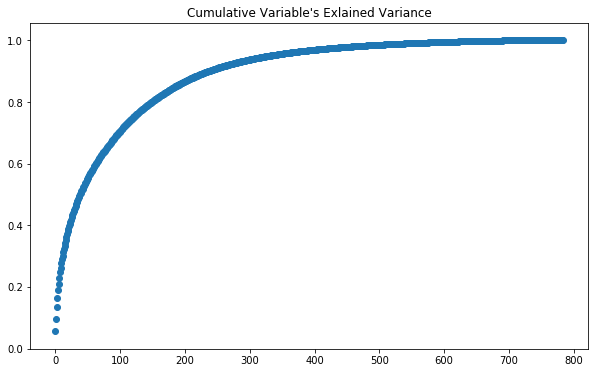

In [95]:
# Determine explained variance of cumulative variables
from sklearn.decomposition import PCA

pca = PCA(n_components=784).fit(X_std)

plt.figure(figsize=(10,6))
plt.scatter(list(range(784)), pca.explained_variance_ratio_.cumsum())
plt.title("Cumulative Variable's Exlained Variance")

In [96]:
# Get top 40 PCA components
from sklearn.decomposition import PCA
n_components = 40
pca = PCA(n_components=40).fit(X_std)
pca.explained_variance_ratio_

array([0.05642719, 0.04041226, 0.03738273, 0.02893   , 0.02520752,
       0.02192549, 0.01914282, 0.01740684, 0.01532232, 0.01396087,
       0.01342175, 0.01201421, 0.01113962, 0.01090581, 0.01027985,
       0.00994954, 0.00931252, 0.00919633, 0.00888595, 0.00863185,
       0.00821729, 0.00798407, 0.00762551, 0.00742282, 0.00716537,
       0.00689235, 0.00681254, 0.00654485, 0.00627176, 0.00609993,
       0.00596929, 0.00588891, 0.00565544, 0.00558772, 0.00551511,
       0.0052845 , 0.00524179, 0.0051355 , 0.00504016, 0.00473708])

In [97]:
# Transform to images
eigen_40 = pca.components_.reshape(n_components,28, 28)

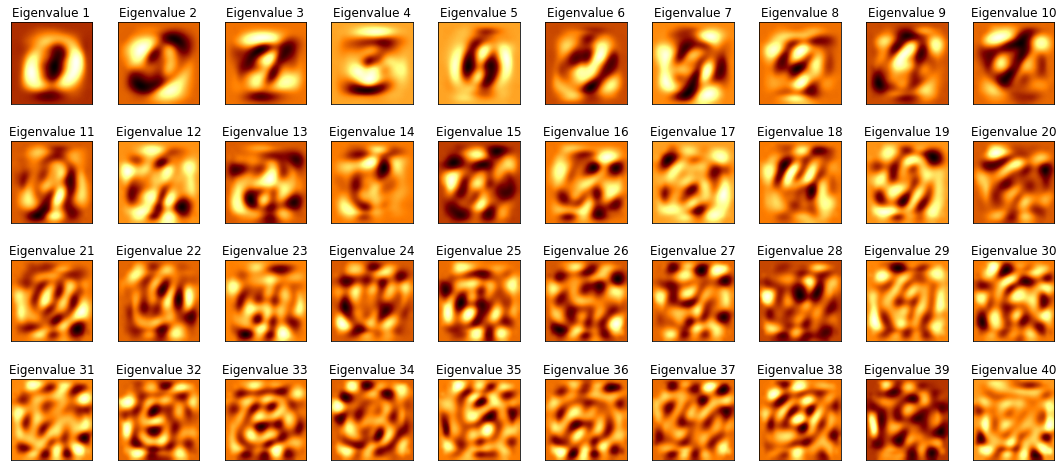

In [98]:
# Plot the first 40 eignenvalues
plt.figure(figsize=(15,15))
for i in list(range(40)):
    plt.subplot(9, 10, i + 1)
    plt.imshow(eigen_40[i], interpolation = "bicubic", cmap = "afmhot")
    title_text = 'Eigenvalue ' + str(i + 1)
    plt.title(title_text, size=12)
    plt.xticks(())
    plt.yticks(())

plt.tight_layout()

In [4]:
# get first 10000 number
data_x =X[0:10000]

In [7]:
# Standardising the values
pca_std = StandardScaler().fit_transform(data_x)

# Call the PCA method with 2 components. 
pca = PCA(n_components=2)
x_2 = pca.fit(pca_std).transform(pca_std)

#### 2.Ignoring the label normally associated to the dataset, construct a clustering of the data.

In [8]:
from sklearn.cluster import KMeans
# Set a KMeans clustering with 10 components cuz there are 10 class labels
kmeans = KMeans(n_clusters=10)
# Compute cluster centers and predict cluster indices
kmeans_10 = kmeans.fit_predict(x_2)

data = [
    go.Scatter(
        x= x_2[:, 0], 
        y= x_2[:, 1], 
        mode="markers",
        showlegend=False,
        marker=dict(
            size=8,
            color = kmeans_10,
            colorscale = 'Rainbow',
            showscale=False, 
            line = dict(
                width = 2,
                color = 'rgb(255, 255, 255)'
            )))]

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)
fig = dict(data = data, layout = layout)
py.iplot(fig, filename="kmeans_plot")

In [9]:
from sklearn.metrics.cluster import v_measure_score
v_measure_score(kmeans_10[0:30], y[0:30])

0.532607443525092

In [10]:
from sklearn.metrics.cluster import v_measure_score
v_measure_score(kmeans_10[80:110], y[80:110])

0.6573446572709443

In [11]:
# We define two functions that help us to see the correspondence between the cluster and the number
vec=[]
lista=[]
def cauta(x):
    for i in range(len(y[0:3000])):
        if x==int(y[i]):
            vec.append(i)
    for i in vec:
        lista.append(kmeans_10[i])
    print(lista)

cauta(1)

[5, 5, 5, 5, 5, 6, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 6, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 1, 5, 6, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5, 5, 

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)
kmeans_12 = kmeans.fit_predict(x_2)

data = [
    go.Scatter(
        x= x_2[:, 0], 
        y= x_2[:, 1], 
        mode="markers",
        showlegend=False,
        marker=dict(
            size=8,
            color = kmeans_12,
            colorscale = 'Rainbow',
            showscale=False, 
            line = dict(
                width = 2,
                color = 'rgb(255, 255, 255)'
            )))]

layout = go.Layout(
    title= 'KMeans Clustering',
    hovermode= 'closest',
    xaxis= dict(
         title= 'First Principal Component',
        ticklen= 8,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'Second Principal Component',
        ticklen= 8,
        gridwidth= 2,
    ),
    showlegend= True
)
fig = dict(data = data, layout = layout)
py.iplot(fig, filename="kmeans_plot")

In [13]:
from sklearn.metrics.cluster import v_measure_score
v_measure_score(kmeans_12[80:110], y[80:110])

0.6877265488608558

In [14]:
from sklearn.metrics.cluster import v_measure_score
v_measure_score(kmeans_12[0:30], y[0:30])

0.5861822243674198

#### We notice that adding 2 more groups The score is a little better!

## Subject 2: Text NewsGroup Classification

#### 1.Download the newsgroups data set using the code below.

In [133]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='train')

#### 2.Construct a text classifier that predicts the target variable (newsgroups.target) from the input data (newsgroups.data).

In [134]:
import functools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os as os
import re 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
LogisticRegression(solver='lbfgs')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
X=newsgroups.data

In [136]:
y=newsgroups.target

In [137]:
#Define the preprocessing functions

html_detector = re.compile('<.*?>',flags=re.UNICODE)
punctuation_detector = re.compile('[\W_ ]',flags=re.UNICODE)  #keep spaces and alpanumeric characters

def drop_html(texts):
  return [re.sub(html_detector,' ',text) for text in texts]

def to_lowercase(texts):
  return [text.lower() for text in texts]

def drop_punctuation(texts):
  return [re.sub(punctuation_detector,' ',text) for text in texts]

def tokenize(texts):
  #here one can get smarter (e.g. wordpiece tokenizer)
  #we'll tokenize based on just the whitespace
  return [text.split(" ") for text in texts]

def drop_whitespaces(texts):
  #assume that the texts are already tokenized
  return [[word for word in text if not word.isspace() and len(word)>0 ] for text in texts]

stemmer = SnowballStemmer('english')
def stem(texts):
  #assume that the texts are already tokenized
  return [[stemmer.stem(word) for word in text] for text in texts]

def identity(x):
  return x

def compose(functions):
    return functools.reduce(lambda f, g: lambda x: f(g(x)), functions, lambda x: x)

def get_preprocessing_pipeline():
  steps = [stem,drop_whitespaces,tokenize,to_lowercase,drop_punctuation,drop_html]
  return compose(steps)

def get_preprocessing_pipeline1():
  steps = [stem,drop_whitespaces,tokenize,to_lowercase,drop_html]
  return compose(steps)
def get_preprocessing_pipeline2():
  steps = [stem,drop_whitespaces,to_lowercase,drop_html]
  return compose(steps)

In [138]:
train_data,test_data,train_target,test_target =train_test_split(X,y,test_size=0.2,random_state=7)

In [139]:
#codificam sentimentele
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_target)
y_test = label_encoder.transform(test_target)

In [140]:
#preprocesam textele

preprocessing_pipeline = get_preprocessing_pipeline()
preprocessed_train = preprocessing_pipeline(train_data)
preprocessed_test = preprocessing_pipeline(test_data)


In [77]:
#vom testa diferite modele pentru textele neprocesate, apoi vom vedea daca putem sa le imbunatatim

models = [
    MultinomialNB(),
    BernoulliNB(),
    LogisticRegression(),
    SGDClassifier(),
    LinearSVC(),
    RandomForestClassifier()
]
vectorizer=[
    TfidfVectorizer(),
    CountVectorizer()
]
for vect in vectorizer:
    print(vect)
    for model in models:
        X_train = vect.fit_transform(train_data)
        X_test = vect.transform(test_data)
        classifier = model.fit(X_train,y_train)
        print(model)
        print(classification_report(y_test,classifier.predict(X_test)))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
              precision    recall  f1-score   support

           0       0.91      0.72      0.80        95
           1       0.91      0.71      0.79       123
           2       0.85      0.80      0.82       129
           3       0.68      0.85      0.76       111
           4       0.89      0.81      0.85       116
           5       0.91      0.81      0.85       113
           6       0.94      0.68      0.79       116
           7 

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        95
           1       0.74      0.80      0.77       123
           2       1.00      0.13      0.23       129
           3       0.57      0.86      0.68       111
           4       0.82      0.80      0.81       116
           5       0.69      0.89      0.78       113
           6       0.95      0.67      0.79       116
           7       0.84      0.91      0.87        97
           8       0.98      0.92      0.95       121
           9       0.98      0.90      0.94       119
          10       0.94      0.98      0.96       127
          11       0.80      0.98      0.88       121
          12       0.88      0.83      0.85       113
          13       0.95      0.94      0.95       124
          14       0.90      0.94      0.92       118
          15       0.76      0.93      0.84       120
          16       0.8

C:\Users\Andreea\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        95
           1       0.77      0.82      0.79       123
           2       0.82      0.85      0.84       129
           3       0.71      0.73      0.72       111
           4       0.88      0.83      0.85       116
           5       0.87      0.82      0.85       113
           6       0.82      0.83      0.82       116
           7       0.85      0.92      0.88        97
           8       0.96      0.92      0.94       121
           9       0.91      0.91      0.91       119
          10       0.93      0.97      0.95       127
          11       0.97      0.94      0.96       121
          12       0.79      0.81      0.80       113
          13 

In [79]:
#sa vedem ce performanta avem atunci cand folosim textul preprocesat

vectorizer_new=[
    TfidfVectorizer(tokenizer=identity,preprocessor=identity),
    CountVectorizer(tokenizer=identity,preprocessor=identity)
]
for vect in vectorizer_new:
    print(vect)
    for model in models:
        X_train = vect.fit_transform(preprocessed_train)
        X_test = vect.transform(preprocessed_test)
        classifier = model.fit(X_train,y_train)
        print(model)
        print(classification_report(y_test,classifier.predict(X_test)))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2',
                preprocessor=<function identity at 0x0000017682E42A68>,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function identity at 0x0000017682E42A68>,
                use_idf=True, vocabulary=None)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
              precision    recall  f1-score   support

           0       0.92      0.72      0.80        95
           1       0.90      0.69      0.78       123
           2       0.86      0.79      0.82       129
           3       0.69      0.87      0.77       111
           4       0.87      0.82      0.84       116
           5   

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.51      0.59      0.55        95
           1       0.41      0.63      0.50       123
           2       0.47      0.61      0.53       129
           3       0.43      0.52      0.47       111
           4       0.52      0.47      0.50       116
           5       0.52      0.53      0.53       113
           6       0.55      0.66      0.60       116
           7       0.43      0.51      0.46        97
           8       0.75

C:\Users\Andreea\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
              precision    recall  f1-score   support

           0       0.93      0.88      0.91        95
           1       0.72      0.76      0.74       123
           2       0.79      0.82      0.81       129
           3       0.67      0.70      0.68       111
           4       0.86      0.82      0.84       116
           5       0.88      0.81      0.84       113
           6       0.83      0.84      0.83       116
           7       0.86      0.92      0.89        97
           8       0.90      0.90      0.90       121
           9       0.93      0.89      0.91       119
          10       0.92      0.94      0.93       127
          11       0.96      0.94      0.95       121
          12       0.80      0.81      0.80       113
          13 

#### Dupa cum putem observa, prin preprocesare unele modele s-au imbunatatit, insa cele doua modele cu precizia cea mai mare, 0.92 , sunt SGDClassifier() si LinearSVC(), ca si in cazul textelor neprocesate. De asemenea, putem observa ca folosind TfidfVectorizer() obtinem precizie mai buna decat cu CountVectorizer().

In [68]:
#testam si modelul MLPClassifier()
vectorizer = TfidfVectorizer(tokenizer=identity,preprocessor=identity)
X_train = vectorizer.fit_transform(preprocessed_train)
X_test = vectorizer.transform(preprocessed_test)

classifier = MLPClassifier().fit(X_train,y_train)
print(classification_report(y_test,classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        95
           1       0.80      0.89      0.84       123
           2       0.87      0.84      0.85       129
           3       0.73      0.79      0.76       111
           4       0.92      0.88      0.90       116
           5       0.90      0.88      0.89       113
           6       0.87      0.84      0.85       116
           7       0.88      0.92      0.90        97
           8       0.97      0.94      0.96       121
           9       0.97      0.97      0.97       119
          10       0.98      0.99      0.99       127
          11       0.98      0.97      0.97       121
          12       0.87      0.92      0.90       113
          13       0.99      0.95      0.97       124
          14       0.97      0.96      0.97       118
          15       0.92      0.91      0.91       120
          16       0.94      0.98      0.96        99
          17       0.98    

C:\Users\Andreea\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:568: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


#### si acest model are precizie destul de buna, insa deoarece merge destul de greu vom alege unul dintre cele doua modele amintite mai sus

In [107]:
pipeline = Pipeline(steps=[
    ('tf_idf',TfidfVectorizer()),
    ('lSvc',LinearSVC())
    
])

param_grid = {
    'tf_idf__max_features': [10000,15000],
    'tf_idf__ngram_range': [(1,1),(1,2),(1,3)],
    'tf_idf__preprocessor':[identity], #we did our own preprocessing and tokenizing
    'tf_idf__tokenizer':[identity],    #we ask tf-idf to not do anything in this regard
    'lSvc__C': [0.1,1]
}

best_clf = GridSearchCV(pipeline, param_grid, cv=2,scoring='accuracy') #should use something like cv ~=10
best_clf = best_clf.fit(preprocessed_train,y_train)

print(classification_report(y_test,best_clf.predict(preprocessed_test)))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        95
           1       0.80      0.84      0.82       123
           2       0.83      0.87      0.85       129
           3       0.73      0.77      0.75       111
           4       0.91      0.85      0.88       116
           5       0.86      0.84      0.85       113
           6       0.85      0.88      0.86       116
           7       0.91      0.91      0.91        97
           8       0.97      0.94      0.95       121
           9       0.96      0.95      0.95       119
          10       0.98      0.98      0.98       127
          11       0.97      0.97      0.97       121
          12       0.87      0.88      0.87       113
          13       0.96      0.96      0.96       124
          14       0.97      0.96      0.96       118
          15       0.89      0.92      0.90       120
          16       0.94      0.97      0.96        99
          17       0.98    

In [142]:
pipeline = Pipeline(steps=[
    ('tf_idf',TfidfVectorizer()),
    ('sgdc',SGDClassifier())
])

param_grid = {
    'tf_idf__max_features': [10000,15000,20000],
    'tf_idf__ngram_range': [(1,1),(1,2),(1,3)],
    'tf_idf__preprocessor':[identity], #we did our own preprocessing and tokenizing
    'tf_idf__tokenizer':[identity]   #we ask tf-idf to not do anything in this regard
}

best_clf = GridSearchCV(pipeline, param_grid, cv=2,scoring='accuracy') #should use something like cv ~=10
best_clf = best_clf.fit(preprocessed_train,y_train)

print(classification_report(y_test,best_clf.predict(preprocessed_test)))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        95
           1       0.83      0.85      0.84       123
           2       0.82      0.85      0.84       129
           3       0.72      0.76      0.74       111
           4       0.87      0.84      0.86       116
           5       0.87      0.84      0.86       113
           6       0.86      0.84      0.85       116
           7       0.90      0.91      0.90        97
           8       0.97      0.96      0.96       121
           9       0.97      0.95      0.96       119
          10       0.95      0.98      0.97       127
          11       0.98      0.98      0.98       121
          12       0.87      0.88      0.87       113
          13       0.95      0.95      0.95       124
          14       0.95      0.96      0.95       118
          15       0.90      0.93      0.91       120
          16       0.95      0.97      0.96        99
          17       0.98    

#### 3.Construct a classification function that can receive a single string

In [15]:
import functools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os as os
import re 
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
LogisticRegression(solver='lbfgs')

#Definim functiile ce reprezinta metodele de modificare a textului

html_detector = re.compile('<.*?>',flags=re.UNICODE)
punctuation_detector = re.compile('[\W_ ]',flags=re.UNICODE)  #keep spaces and alpanumeric characters

def drop_html(texts):
  return [re.sub(html_detector,' ',text) for text in texts]

def to_lowercase(texts):
  return [text.lower() for text in texts]

def drop_punctuation(texts):
  return [re.sub(punctuation_detector,' ',text) for text in texts]

def tokenize(texts):
  #here one can get smarter (e.g. wordpiece tokenizer)
  #we'll tokenize based on just the whitespace
  return [text.split(" ") for text in texts]

def drop_whitespaces(texts):
  #assume that the texts are already tokenized
  return [[word for word in text if not word.isspace() and len(word)>0 ] for text in texts]

stemmer = SnowballStemmer('english')
def stem(texts):
  #assume that the texts are already tokenized
  return [[stemmer.stem(word) for word in text] for text in texts]

def identity(x):
  return x

def compose(functions):
    return functools.reduce(lambda f, g: lambda x: f(g(x)), functions, lambda x: x)

def get_preprocessing_pipeline():
  steps = [stem,drop_whitespaces,tokenize,to_lowercase,drop_punctuation,drop_html]
  return compose(steps)

preprocessing_pipeline = get_preprocessing_pipeline()

#importam baza de date

from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='train')

X=newsgroups.data
y=newsgroups.target
train_data,test_data,train_target,test_target =train_test_split(X,y,test_size=0.2,random_state=7)

#codam sentimentele din comentarii
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_target)
y_test = label_encoder.transform(test_target)

#efectuam procesarea textelor
preprocessed_train = preprocessing_pipeline(train_data)
preprocessed_test = preprocessing_pipeline(test_data)


#### dupa cum am testat mai sus, putem alege modelele formate din TfidfVectorizer()+LinearSVC() si TfidfVectorizer()+SGDClassifier(), modele ce au avut cea mai buna performanta 

## definim Functia: classification_function(text,model)

In [16]:
#definim functia care va primi ca argumente o lista de string si modelul ales
def classification_function(text,model):
    vectorizer=TfidfVectorizer(tokenizer=identity,preprocessor=identity)
    X_train = vectorizer.fit_transform(preprocessed_train)
    X_test=vectorizer.transform(preprocessed_test)
    classifier = model.fit(X_train,y_train)
    print(classifier.predict(vectorizer.transform(text)))


classification_function(preprocessing_pipeline(["From: nenad%saturn@sdsu.EDU (Nenad Marovac)\nSubject: C++ and C for OS/2\nOrganization: The Internet\nLines: 9\nNNTP-Posting-Host: enterpoop.mit.edu\nTo: xpert@expo.lcs.mit.edu\nCc: nenad@saturn.SDSU.EDU\n\n\nHi folks,\n]\nDoes anybody know for a good 32-bit C++/C compiler for OS/2 that supports\nOS/2 API and Microsoft windows (maybe Windows NT)?\n\nthanx\n\nN. Marovac, SDSU\n"]),LinearSVC())

classification_function(preprocessing_pipeline(["From: nenad%saturn@sdsu.EDU (Nenad Marovac)\nSubject: C++ and C for OS/2\nOrganization: The Internet\nLines: 9\nNNTP-Posting-Host: enterpoop.mit.edu\nTo: xpert@expo.lcs.mit.edu\nCc: nenad@saturn.SDSU.EDU\n\n\nHi folks,\n]\nDoes anybody know for a good 32-bit C++/C compiler for OS/2 that supports\nOS/2 API and Microsoft windows (maybe Windows NT)?\n\nthanx\n\nN. Marovac, SDSU\n"]),SGDClassifier())

[5]
[5]


In [17]:
test_data[0:3]

['From: bob1@cos.com (Bob Blackshaw)\nSubject: Re: Dumbest automotive concepts of all time\nOrganization: Corporation for Open Systems\nDistribution: world \nLines: 56\n\nIn <C5HI0B.26C@constellation.ecn.uoknor.edu> callison@uokmax.ecn.uoknor.edu (James P. Callison) writes:\n\n>In article <1993Apr13.220105.26409@slcs.slb.com> dcd@se.houston.geoquest.slb.com (Dan Day) writes:\n>>In article <93Apr08.202003.27851@acs.ucalgary.ca> parr@acs.ucalgary.ca (Charles Parr) writes:\n>>>As a long time motorcyclist, I have never understood what\n>>>posessed auto builders to put delicate controls, which must\n>>>be used with skill and finesse, like clutches and brakes,\n>>>on the floor.\n>>>\n>>>Why not hand control? It\'s much much easier.\n>>\n>>In the early days, neither of these functions had power-assist, so\n>>only legs had enough strength to activate them.  Since then, it\'s\n>>been traditional and people would have a hard time getting\n>>used to anything else.  \n\n>Well, where, exactly, woul

In [18]:
y_test[0:3]

array([ 7,  5, 10], dtype=int64)

In [164]:
#verificam si cu modelul pentru textele nepreprocesate

vectorizer1=TfidfVectorizer()
X_train1 = vectorizer1.fit_transform(train_data)
X_test1 = vectorizer1.transform(test_data)
classifier1 = LinearSVC().fit(X_train1,y_train)
print(classifier1.predict(vectorizer1.transform(['From: nenad%saturn@sdsu.EDU (Nenad Marovac)\nSubject: C++ and C for OS/2\nOrganization: The Internet\nLines: 9\nNNTP-Posting-Host: enterpoop.mit.edu\nTo: xpert@expo.lcs.mit.edu\nCc: nenad@saturn.SDSU.EDU\n\n\nHi folks,\n]\nDoes anybody know for a good 32-bit C++/C compiler for OS/2 that supports\nOS/2 API and Microsoft windows (maybe Windows NT)?\n\nthanx\n\nN. Marovac, SDSU\n'])))


[5]
